### Importing libraries

In [1]:
import pickle
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
import numpy as np

C:\Users\ADMIN\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Loading datasets from pickle file

In [3]:
pickle_in = open("trainX.pickle","rb")
X = pickle.load(pickle_in)

pickle_in_2 = open("testX.pickle", "rb")
x_test_final = pickle.load(pickle_in_2)

pickle_in_3 = open("trainY.pickle", "rb")
y = pickle.load(pickle_in_3)

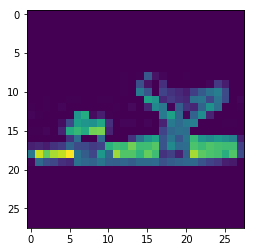

In [4]:
plt.imshow(X[59999])

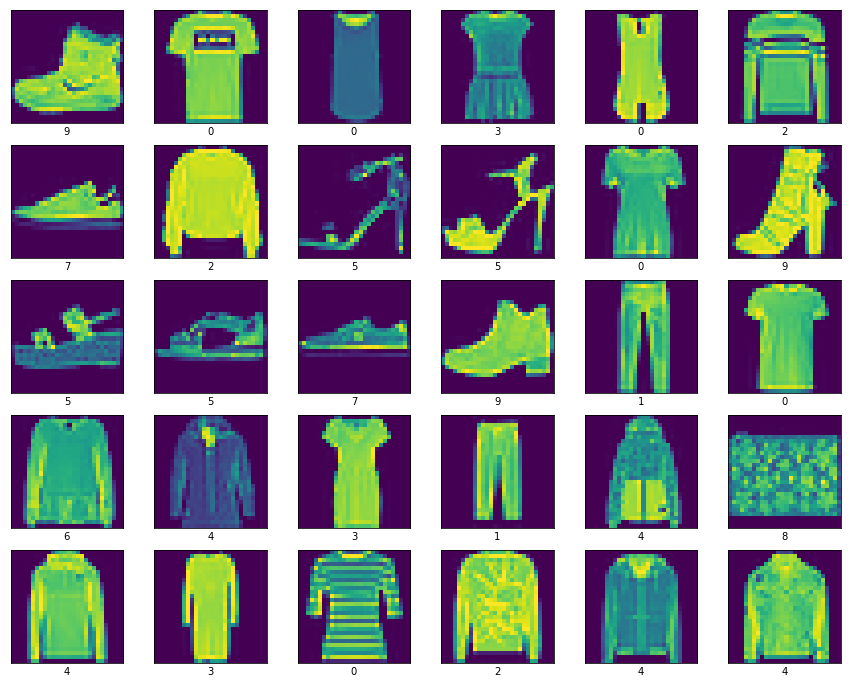

In [5]:
plt.figure(figsize=(15,12))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(y[i])
plt.show()

## As we can see from the plot that numbers 0-9 are used for classifying different types of clothes

In [6]:
#input image dimensions
img_rows, img_cols = 28, 28

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
X_train.shape

(45000, 28, 28)

In [8]:
y_train.shape

(45000,)

In [9]:
X_test.shape

(15000, 28, 28)

In [10]:
y_test.shape

(15000,)

In [11]:
X_train = X_train.reshape((45000, 784))
X_train.shape

(45000, 784)

In [12]:
K.image_data_format()

'channels_last'

In [13]:
if K.image_data_format() =='channels_first':
  X_train = X_train.reshape(X_train.shape[0],1,img_rows,img_cols)
  X_test = X_test.reshape(X_test.shape[0],1,img_rows,img_cols)
  input_shape = (1,img_rows, img_cols)
  
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
  input_shape=(img_rows, img_cols, 1)

In [14]:
print(input_shape)

(28, 28, 1)


In [15]:
batch_size = 128
num_classes = 10
epochs = 10

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /=255
X_test /=255
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train shape:  (45000, 28, 28)
45000 train samples
15000 test samples


In [17]:
X_train = np.reshape(X_train, (45000, 784))
X_test = np.reshape(X_test, (15000, 784))

In [18]:
model = Sequential()
model.add(Dense(500, input_dim=784))
model.add(Activation('relu'))
# model.add(Dropout(0.4))
model.add(Dense(300))
model.add(Activation('relu'))
# model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 

### Fitting in training model and printing accuracies

In [19]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_test,y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print(('Test loss: ', score[0]))
print('Test accuracy', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 15000 samples
Epoch 1/5
45000/45000 [==============================] - 20s 444us/step - loss: 0.5972 - acc: 0.7832 - val_loss: 0.4934 - val_acc: 0.8189
Epoch 2/5
45000/45000 [==============================] - 18s 398us/step - loss: 0.4095 - acc: 0.8472 - val_loss: 0.4229 - val_acc: 0.8494
Epoch 3/5
45000/45000 [==============================] - 18s 403us/step - loss: 0.3615 - acc: 0.8659 - val_loss: 0.3776 - val_acc: 0.8617
Epoch 4/5
45000/45000 [==============================] - 20s 434us/step - loss: 0.3274 - acc: 0.8790 - val_loss: 0.3724 - val_acc: 0.8588
Epoch 5/5
45000/45000 [==============================] - 19s 425us/step - loss: 0.3068 - acc: 0.8857 - val_loss: 0.3474 - val_acc: 0.8741
('Test loss: ', 0.3474036666552226)
Test accuracy 0.8740666666348775


In [20]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=10,verbose=1,validation_data=(X_test,y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print(('Test loss: ', score[0]))
print('Test accuracy', score[1])

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 18s 394us/step - loss: 0.2869 - acc: 0.8921 - val_loss: 0.3707 - val_acc: 0.8692
Epoch 2/10
45000/45000 [==============================] - 17s 367us/step - loss: 0.2715 - acc: 0.8978 - val_loss: 0.3153 - val_acc: 0.8847
Epoch 3/10
45000/45000 [==============================] - 17s 368us/step - loss: 0.2573 - acc: 0.9033 - val_loss: 0.3086 - val_acc: 0.8874
Epoch 4/10
45000/45000 [==============================] - 17s 376us/step - loss: 0.2455 - acc: 0.9064 - val_loss: 0.3280 - val_acc: 0.8831
Epoch 5/10
45000/45000 [==============================] - 17s 375us/step - loss: 0.2341 - acc: 0.9107 - val_loss: 0.3283 - val_acc: 0.8863
Epoch 6/10
45000/45000 [==============================] - 18s 398us/step - loss: 0.2237 - acc: 0.9150 - val_loss: 0.3241 - val_acc: 0.8854
Epoch 7/10
45000/45000 [==============================] - 17s 382us/step - loss: 0.2131 - acc: 0.9201 - val_loss: 0.

In [21]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=15,verbose=1,validation_data=(X_test,y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print(('Test loss: ', score[0]))
print('Test accuracy', score[1])

Train on 45000 samples, validate on 15000 samples
Epoch 1/15
45000/45000 [==============================] - 17s 373us/step - loss: 0.1815 - acc: 0.9303 - val_loss: 0.4116 - val_acc: 0.8659
Epoch 2/15
45000/45000 [==============================] - 17s 385us/step - loss: 0.1729 - acc: 0.9344 - val_loss: 0.3777 - val_acc: 0.8835
Epoch 3/15
45000/45000 [==============================] - 17s 386us/step - loss: 0.1676 - acc: 0.9357 - val_loss: 0.3552 - val_acc: 0.8880
Epoch 4/15
45000/45000 [==============================] - 19s 412us/step - loss: 0.1623 - acc: 0.9378 - val_loss: 0.3346 - val_acc: 0.8940
Epoch 5/15
45000/45000 [==============================] - 18s 407us/step - loss: 0.1549 - acc: 0.9406 - val_loss: 0.3533 - val_acc: 0.8909
Epoch 6/15
45000/45000 [==============================] - 18s 392us/step - loss: 0.1490 - acc: 0.9429 - val_loss: 0.3373 - val_acc: 0.8933
Epoch 7/15
45000/45000 [==============================] - 15s 332us/step - loss: 0.1415 - acc: 0.9453 - val_loss: 0.

## Best Accuracy is with 10 epochs

### Predicting values considering train data to be complete training data

In [23]:
X_train_final = X.astype('float32')
X_test_final = x_test_final.astype('float32')

X_train_final /=255
X_test_final /=255
print('X_train shape: ', X_train_final.shape)
print(X_train_final.shape[0], 'train samples')
print(X_test_final.shape[0], 'test samples')

y_train_final = keras.utils.to_categorical(y, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

X_train shape:  (60000, 28, 28)
60000 train samples
10000 test samples


In [24]:
 y_train_final.shape

(60000, 10)

In [25]:
X_test_final.shape

(10000, 28, 28)

In [26]:
X_train_final = np.reshape(X_train_final, (60000, 784))
X_test_final = np.reshape(X_test_final, (10000, 784))

In [27]:
model.fit(X_train_final,y_train_final,batch_size=batch_size,epochs=10,verbose=1)


Epoch 1/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.1807 - acc: 0.9384
Epoch 2/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.1630 - acc: 0.9426
Epoch 3/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.1523 - acc: 0.9451
Epoch 4/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.1405 - acc: 0.9491
Epoch 5/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.1348 - acc: 0.95101s -
Epoch 6/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.1291 - acc: 0.9527
Epoch 7/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.1221 - acc: 0.9556
Epoch 8/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.1169 - acc: 0.9563
Epoch 9/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.1121 - acc: 0.95882s - l - ETA: 1s 
Epoch 10/10
60000/60000 [==============================] - 11

### Predicting y on the basis of X test

In [28]:
y_pred = model.predict_classes(X_test_final)

In [29]:
y_pred.shape

(10000,)

In [30]:
y.shape

(60000,)

In [31]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [32]:
y

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Saving data in pickle file

In [33]:
pickle_out=open("predictions_Y_pred.pickle","wb")
pickle.dump(y_pred,pickle_out)
pickle_out.close()

### Cosing all files

In [34]:
pickle_in.close()
pickle_in_2.close()
pickle_in_3.close()